# Aktienanlage

### Faustregeln:
1. Ist der DAX in einem Jahr bis Ende Oktober um $30$ Prozent gefallen, kaufe Aktien!
2. Kaufe weder Aktienfonds noch Zertifikate
3. Aktienkäufe lohnen sich nur, wenn du insgemsamt mindestens $6000$ Euro anlegst!
4. Kaufe nur Aktien, wenn du das Geld in den nächsten drei Jahren nicht brauchst!
5. Kaufe Aktien mit niedriger Bewertung und relativer Stärke!
6. Ist der DAX schon drei bis vier Jahre lang gestiegen, verkaufe!
7. Treibt die Zentralbank ihre Leitzinsen schon seit $12$ Monaten nach oben, verkaufe!
8. Liest du in der Zeitung von Rekordgewinnen und Übernahmen, verkaufe!
9. Höre nicht auf Berater, auch nicht von deiner Bank!
10. Bedenke, dass die Mehrheitsmeinung bekannt und daher schon von gestern ist!

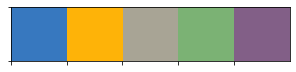

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
import seaborn as sns
#plt.rcParams['axes.facecolor']='honeydew'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] 
#plt.rc('lines',linewidth=1,linestyle='solid')
#plt.rc('font',size=18)
#plt.rc('grid',color='lightgrey',)
#mpl.rcParams["axes.edgecolor"] = 'lightgrey'
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.set(color_codes=True)

In [2]:
start = datetime.datetime(1999,1,1)
finish = datetime.datetime.now()
# Indices
dax = web.DataReader('^GDAXI','yahoo',start,finish)
volatility_index = web.DataReader('^VIX','yahoo',start,finish)
banken_index = web.DataReader('^STOXX','yahoo',start,finish)
dow_jones_utility = web.DataReader('^DJU','yahoo',start,finish)
nasdaq = web.DataReader('^IXIC','yahoo',start,finish)
# Anleihen
us_bond = web.DataReader('^TNX','yahoo',start,finish)
#Rohstoff
gold = web.DataReader('GC=F','yahoo',start,finish)
oil = web.DataReader('CL=F','yahoo',start,finish)
bitcoin= web.DataReader('BTC-USD','yahoo',start,finish)
#Einzelwert
apple = web.DataReader('AAPL','yahoo',start,finish)
wirecard = web.DataReader('WDI.DE','yahoo',start,finish)

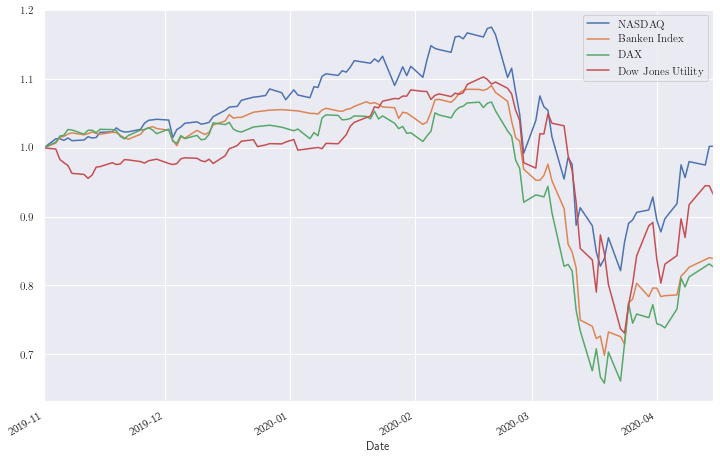

In [3]:

norm_nasdaq=nasdaq['Open']['2019-11-01':]/nasdaq['Open']['2019-11-01']
norm_banken_index=banken_index['Open']['2019-11-01':]/banken_index['Open']['2019-11-01']
norm_dax=dax['Open']['2019-11-01':]/dax['Open']['2019-11-01']
norm_dow_jones_utility=dow_jones_utility['Open']['2019-11-01':]/dow_jones_utility['Open']['2019-11-01']
norm_nasdaq.plot(label='$\mathrm{NASDAQ}$',figsize=(12,8))
norm_banken_index.plot(label='$\mathrm{Banken\; Index}$',figsize=(12,8))
norm_dax.plot(label='$\mathrm{DAX}$',figsize=(12,8))
norm_dow_jones_utility.plot(label='$\mathrm{Dow\; Jones\; Utility}$',figsize=(12,8))
#plt.grid()
plt.legend();


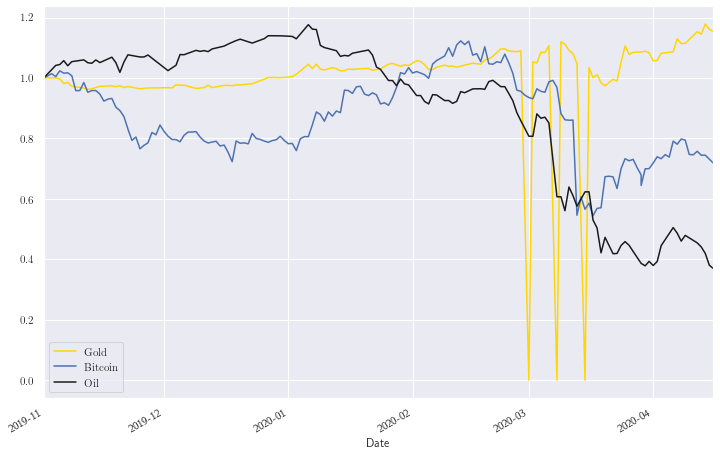

In [4]:
norm_gold=gold['Open']['2019-11-01':]/gold['Open']['2019-11-01']
norm_oil=oil['Open']['2019-11-01':]/oil['Open']['2019-11-01']
norm_bitcoin=bitcoin['Open']['2019-11-01':]/bitcoin['Open']['2019-11-01']
norm_gold.plot(label='$\mathrm{Gold}$',figsize=(12,8),color='gold')
norm_bitcoin.plot(label='$\mathrm{Bitcoin}$',figsize=(12,8),color='b')
norm_oil.plot(label='$\mathrm{Oil}$',figsize=(12,8),color='k')

#plt.grid()
plt.legend()



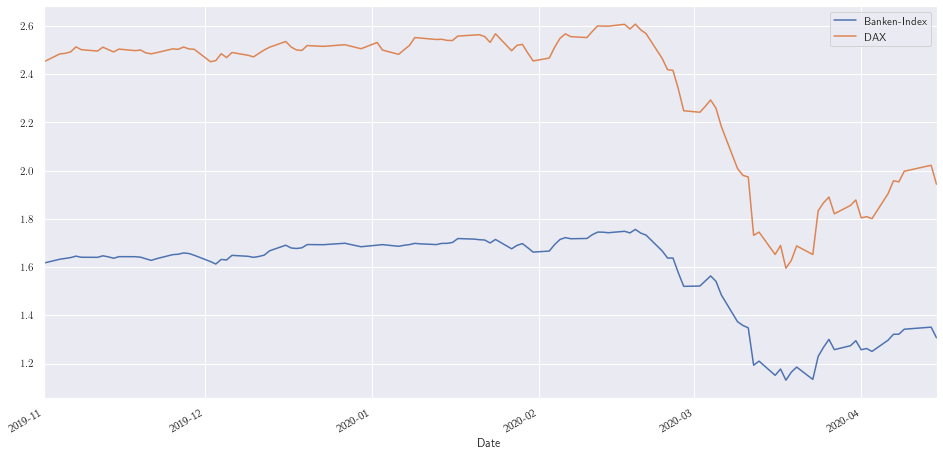

In [5]:
banken_index['norm']=banken_index['Close'][::]/banken_index['Close'][0]
dax['norm']=dax['Close'][::]/dax['Close'][0]

banken_index['norm']['2019-11-01':].plot(figsize=(16,8),label='Banken-Index')
dax['norm']['2019-11-01':].plot(label='DAX')
plt.legend()


# Bollinger Band

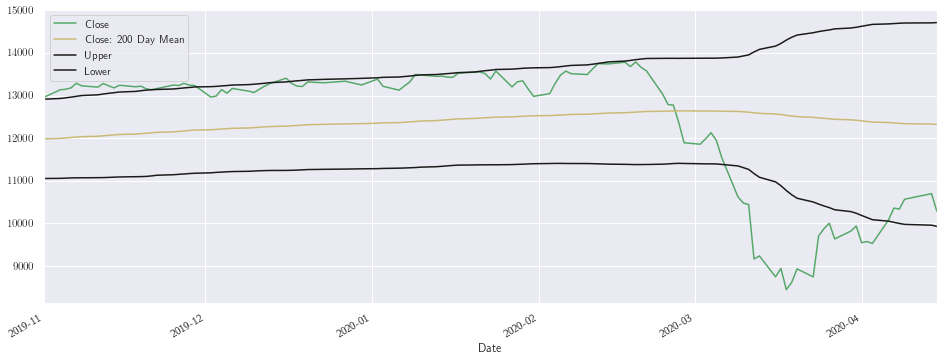

In [6]:
# Close 20 MA
dax['Close: 200 Day Mean'] = dax['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
dax['Upper'] = dax['Close: 200 Day Mean']+2*(dax['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
dax['Lower'] = dax['Close: 200 Day Mean']-2*(dax['Close'].rolling(200).std())
# Close
dax[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-11-01':].plot(figsize=(16,6),color=['g','y','k','k'])


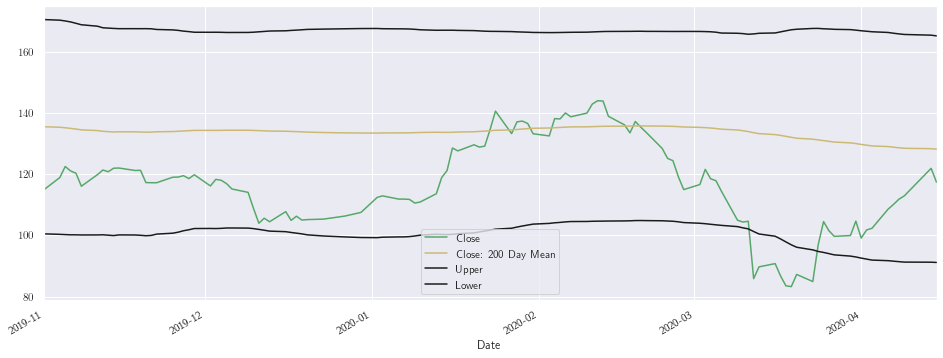

In [7]:
# Close 20 MA
wirecard['Close: 200 Day Mean'] = wirecard['Close'].rolling(200).mean()
# Upper = 20 MA + 2*std(20)
wirecard['Upper'] = wirecard['Close: 200 Day Mean']+2*(wirecard['Close'].rolling(200).std())
# Lower = 20 MA - 2*strd(20)
wirecard['Lower'] = wirecard['Close: 200 Day Mean']-2*(wirecard['Close'].rolling(200).std())
# Close
wirecard[['Close','Close: 200 Day Mean','Upper','Lower']]['2019-11-01':].plot(figsize=(16,6),color=['g','y','k','k'])


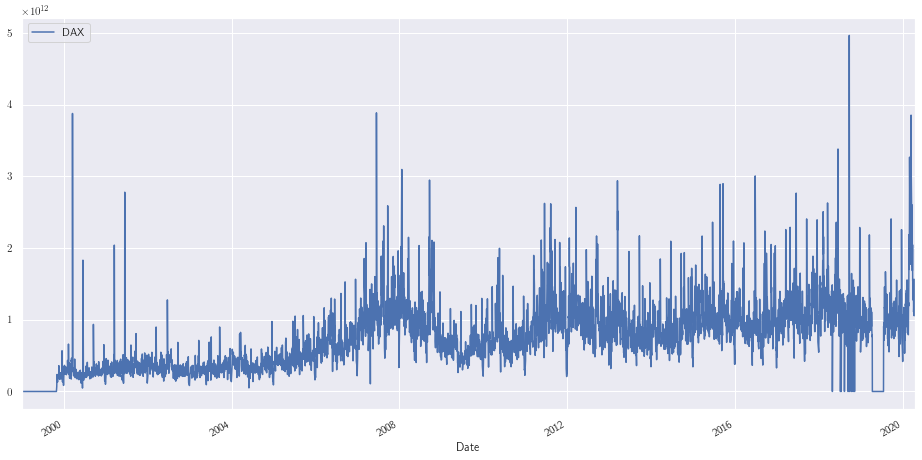

In [8]:
wirecard['Total Traded'] = wirecard['Open']*wirecard['Volume']

dax['Total Traded'] = dax['Open']*dax['Volume']
dax['Total Traded'].plot(label='DAX',figsize=(16,8))
plt.legend()

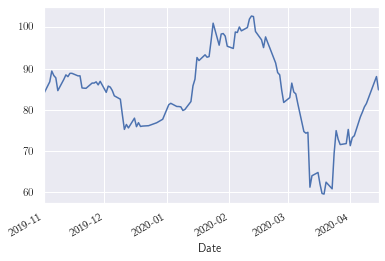

In [9]:
wirecard['relative Stärke'] = wirecard['Close'].rolling(456).mean()
#wirecard[['relative Stärke','Close']]['2019-11-01':].plot(label='Wirecard 15-Monate',figsize=(16,8))
wirecard['relative Stärke'] = wirecard['Close']*100/wirecard['relative Stärke']
wirecard['relative Stärke']['2019-11-01':].plot()

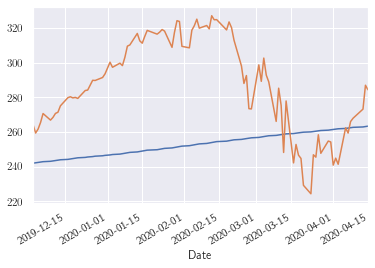

In [10]:
apple['20 Years Mean'] = apple['Close'].rolling(3600).mean()*3
apple['Difference betw value and 20Y mean']=apple['Close']-apple['20 Years Mean']

#apple['20 Years Mean'] = apple['20 Years Mean']*apple['Difference betw value and 20Y mean'].mean()
wirecard['20 Years Mean'] = wirecard['Close'].rolling(1000).mean()
#wirecard['20 Years Mean']['2017-01-01':].plot(figsize=(16,8),color='orange')
#wirecard['Close']['2017-01-01':].plot(color='r')
apple['20 Years Mean']['2019-12-01':].plot()
apple['Close']['2019-12-01':].plot()


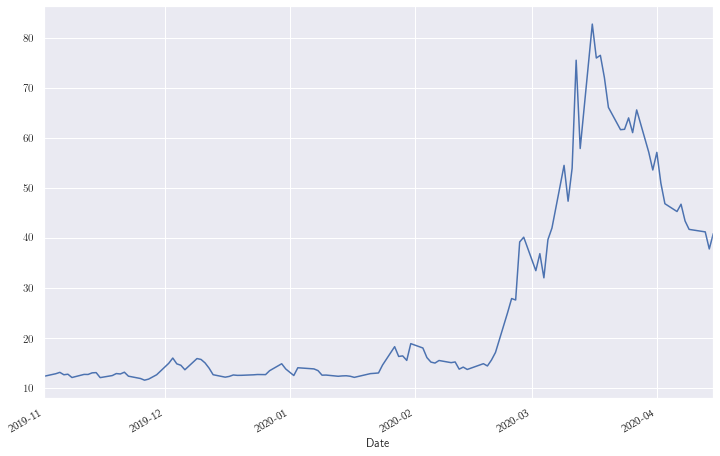

In [11]:
volatility_index['Close']['2019-11-01':].plot(figsize=(12,8))
